<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


#  Sentiment Analysis <a class="anchor" id="PSCRAP"></a>



<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Table of Contents <a class="anchor" id="SENT_toc"></a>

* [Table of Contents](#SENT_toc)
    * [1. Description](#SENT_page_1)
    * [2. Import Packages and Notebook Setup](#SENT_page_2)
    * [3. Import Data](#SENT_page_3)
    * [4. Training Data Wrangling, Processing and Visualization](#SENT_page_4)
    * [5. Test Data Wrangling, Processing and Visualization](#SENT_page_5)
    * [6. Training the Model](#SENT_page_6)
    * [7. Cleaning The Data](#SENT_page_7)
    * [8. Creating a new Cleaned Dataset](#SENT_page_8)
    * [9. Counting Columns](#SENT_page_9)
    * [10. Get Info about the Dataset](#SENT_page_10)
    * [11. Get Descriptive Statistics about the Dataset](#SENT_page_11)
    * [12. Counting Rows and Removing any NANs](#SENT_page_12)
    * [13. Correlation Analysis](#SENT_page_13)
    * [14. Principal Component Analysis (PCA)](#SENT_page_14)
    * [15. Group Comparison](#SENT_page_15)
    * [16. TBD](#SENT_page_16)
    * [17. Groupby Function](#SENT_page_17)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 1 - Description <a class="anchor" id="SENT_page_1"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

> Add description here 

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 2 - Import Packages and Notebook Setup <a class="anchor" id="SENT_page_2"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [1]:
# Data import and manipulation
import pandas as pd
import numpy as np # for linear algebra


# Text processing and tokenization
import re
import nltk # Natural Language Took Kit
from nltk.corpus import stopwords # Used to set up stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Balancing the Data
from sklearn.utils import resample

# Building and Training the Model
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [128]:
# Set no max rows and columns to view data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 3 - Import Data <a class="anchor" id="SENT_page_3"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

> Reference:
The dataset 'train' was downloaded from Kaggle and originally post by ANKUR SINHA, and can be found
[HERE:](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news?resource=download)

In [3]:
# Test data is the datat collected in the Web Scrape Notebook

test = pd.read_csv('../Data/ConsolidatedHeadline_CV.csv', encoding='latin-1')

In [4]:
test.to_csv('../Data/UTFdata_CV.csv', encoding='utf-8')

In [5]:
testA = pd.read_csv('../Data/UTFdata_CV.csv', encoding='utf-8')

In [6]:
# Training data from Kaggle

train = pd.read_csv('../Data/SentimentAnalysisTrainData_CV.csv', encoding='latin-1')

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 4 -Training Data Wrangling, Processing and Visualization <a class="anchor" id="SENT_page_4"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

>Here I will be formatting the raw data

# View data loaded as 'train'

In [7]:
train.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Training Data Wrangling



<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [8]:
train_col = train.rename(columns={train.columns[0]: 'sent_code', train.columns[1]: 'text'})

In [9]:
train_col.head()

,sent_code,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [10]:
values = train_col.iloc[:, 0].value_counts()
values

sent_code
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

## Recode the data as:
* Negative = 0
* Neutral = 1
* Positive = 2

In [12]:
trainR = train_col.replace({'sent_code': {'negative': 0, 'neutral': 1, 'positive': 2}})


# Exploring the Data

In [13]:
trainR.head(3)

,sent_code,text
0,1,Technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...
2,2,With the new production plant the company woul...


In [14]:
# Confirm values
trainR.iloc[:, 0].value_counts()

sent_code
1    2878
2    1363
0     604
Name: count, dtype: int64

In [15]:
# Look at headlines with target = 0 which indicates a negative headline
trainR[trainR['sent_code'] == 0]['text'].values[0:1]

array(['The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .'],
      dtype=object)

In [16]:
# Look at headlines with target = 1 which indicates a neutral headline
trainR[trainR['sent_code'] == 1]['text'].values[0:1]

array(['Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .'],
      dtype=object)

In [17]:
# Look at headlines with target = 2 which indicates a positive headline
trainR[trainR['sent_code'] == 2]['text'].values[0:1]

array(['With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .'],
      dtype=object)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Process Training Data



<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

> Here I will prepare the data for and tokenize the data

In [40]:
# import re
# import nltk
# from nltk.corpus import stopwords # Used to set up stopwords
# from nltk.tokenize import word_tokenize 
# from nltk.stem import WordNetLemmatizer
# from collections import Counter

# # Visualization
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

In [19]:
# Had to pip install wordcloud for visualization
# !pip install wordcloud

## Starting with original text and recoded sentiment category

In [20]:
trainR.head(2)

,sent_code,text
0,1,Technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...


In [148]:
# Create working Dataframe for processing
train_viz = trainR
# train_viz.head(2)

## Making all text lower case

In [22]:
# Create empty dataframe for processed training data
train_vizP = pd.DataFrame()

# Add text data as lower case
train_vizP['processed_text'] = train_viz['text'].apply(lambda x: x.lower())

## Removing Spaces and unwanted non alphabetic characters

In [23]:
# Remove unwanted characters from text data
train_vizP['processed_text'] = train_vizP['processed_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [24]:

# Add the column with sentiment labels for training
train_vizP['sentiment'] = train_viz['sent_code']

In [149]:
# Preview Clean data
# train_vizP.head(3)

## Tokenization of the processed/clean text

In [26]:
train_vizP['tokens'] = train_vizP['processed_text'].apply(word_tokenize)

In [150]:
train_vizP.head(2)

,processed_text,sentiment,tokens,filtered_tokens
0,technopolis plans to develop in stages an area...,1,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le..."
1,the international electronic industry company ...,0,"[the, international, electronic, industry, com...","[international, electronic, industry, company,..."


## Removing Stop words


#### Establish library of stopwords using nltk

In [28]:
# Set up stop words

# nltk.download('stopwords')  # Download if needed
stop_words = set(stopwords.words('english'))

In [29]:
# Create function to remove stop words from a list of tokens
def remove_stop_words(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

In [30]:
# Apply the function
train_vizP['filtered_tokens'] = train_vizP['tokens'].apply(remove_stop_words)

#### The filtered_tokens column shows the clean/processed tokens

In [34]:
train_vizP.head()

,processed_text,sentiment,tokens,filtered_tokens
0,technopolis plans to develop in stages an area...,1,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le..."
1,the international electronic industry company ...,0,"[the, international, electronic, industry, com...","[international, electronic, industry, company,..."
2,with the new production plant the company woul...,2,"[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre..."
3,according to the company s updated strategy fo...,2,"[according, to, the, company, s, updated, stra...","[according, company, updated, strategy, years,..."
4,financing of aspocomp s growth aspocomp is agg...,2,"[financing, of, aspocomp, s, growth, aspocomp,...","[financing, aspocomp, growth, aspocomp, aggres..."


# Explore the clean data for sentiment distribution and word frequency

In [35]:
train_vizP.shape

(4845, 4)

In [ ]:
# This uses Counter() to count the words for frequency visualization

word_freq = Counter()
for tokens in train_vizP['filtered_tokens']:
    word_freq.update(tokens)

In [97]:
# Get the most common words and their frequencies
top_words = word_freq.most_common(20)
print(top_words)

[('eur', 1310), ('company', 846), ('mn', 593), ('said', 544), ('finnish', 512), ('sales', 453), ('million', 441), ('net', 412), ('profit', 409), ('finland', 337), ('group', 320), ('operating', 299), ('mln', 290), ('year', 282), ('new', 267), ('business', 265), ('period', 264), ('oyj', 241), ('quarter', 238), ('share', 237)]


#### Visualization of Word Frequency

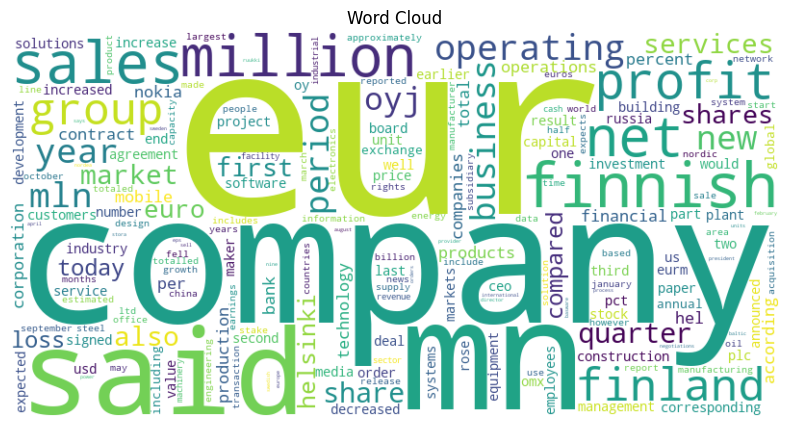

In [98]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

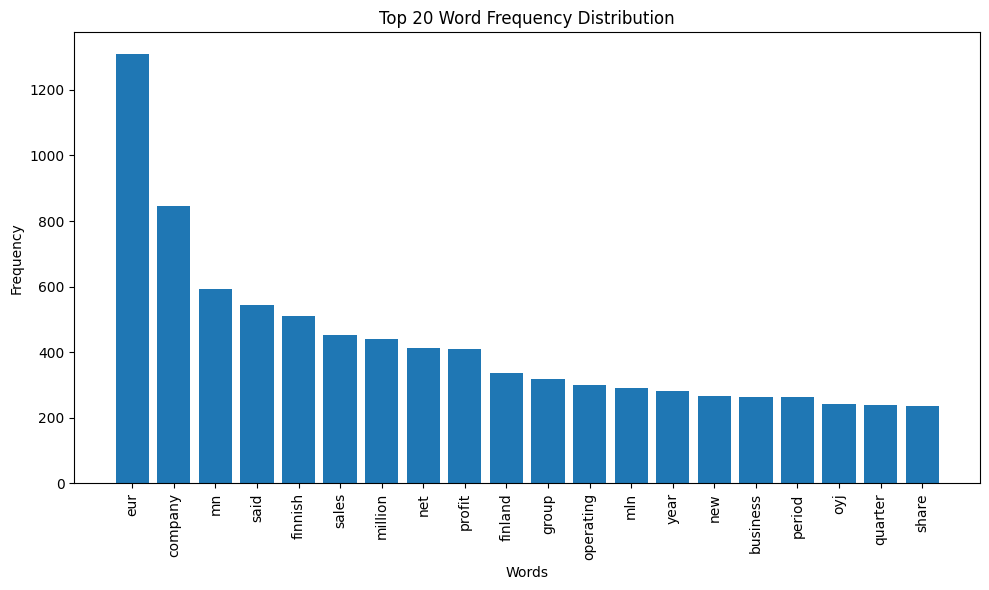

In [99]:
import matplotlib.pyplot as plt


# Extract the words and frequencies into separate lists
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# Create a bar plot for frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequency Distribution')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# Distribution of Sentiment

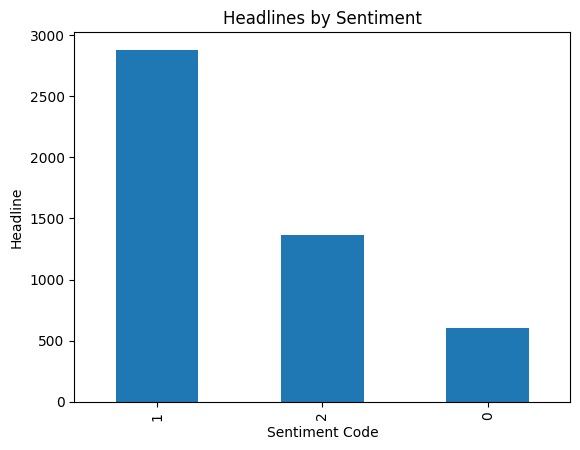

In [47]:
train_vizP[['sentiment', 'filtered_tokens']].value_counts('sentiment').plot(kind='bar', title='Headlines by Sentiment')
plt.xlabel('Sentiment Code')
plt.ylabel('Headline')
plt.show()


## The Data needs to be balanced

#### Creating variable for balancing

In [151]:
# Isolate the two columns for processing
train_B = pd.DataFrame
train_B = train_vizP[['sentiment','filtered_tokens']]
train_B.head(2)

,sentiment,filtered_tokens
0,1,"[technopolis, plans, develop, stages, area, le..."
1,0,"[international, electronic, industry, company,..."


#### Resampling the Data

In [59]:
# from sklearn.utils import resample

# Separate the data based on sentiment values
sentiment_0 = train_B[train_B['sentiment'] == 0]
sentiment_1 = train_B[train_B['sentiment'] == 1]
sentiment_2 = train_B[train_B['sentiment'] == 2]

# Resample the majority class (sentiment 0 and sentiment 2) to match the size of the minority class (sentiment 1)
sentiment_0_resampled = resample(sentiment_0, replace=True, n_samples=len(sentiment_1))
sentiment_2_resampled = resample(sentiment_2, replace=True, n_samples=len(sentiment_1))

# Concatenate the resampled data with the original sentiment 1 data
balanced_data = pd.concat([sentiment_0_resampled, sentiment_1, sentiment_2_resampled])

# Display the balanced DataFrame
balanced_data.head()


,sentiment,filtered_tokens
4662,0,"[cocacola, market, leader, manufacturers, mark..."
4745,0,"[nokia, shares, hit, euros, friday, percent, s..."
4016,0,"[finnish, automation, solutions, developer, ce..."
4782,0,"[currently, company, foresees, pretax, profit,..."
1799,0,"[finnish, insurance, company, fennia, kesko, g..."


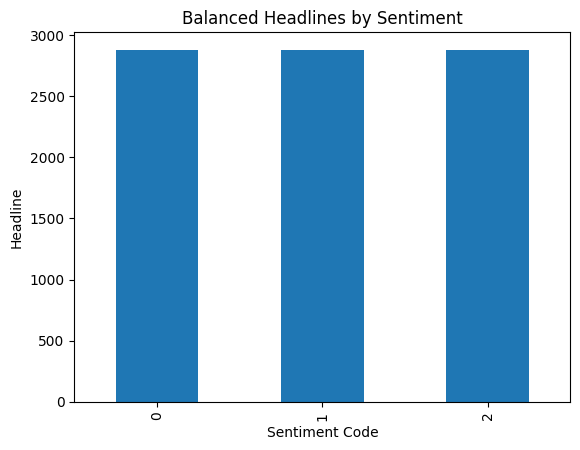

In [60]:
balanced_data[['sentiment', 'filtered_tokens']].value_counts('sentiment').plot(kind='bar', title='Balanced Headlines by Sentiment')
plt.xlabel('Sentiment Code')
plt.ylabel('Headline')
plt.show()

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 5 -Test Data Wrangling, Processing and Visualization <a class="anchor" id="SENT_page_5"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [78]:
# Create a df to work with from the imported df
test1 = testA

# Wrangling

#### There is an unnamed column here that needs to be dropped as well as many Null Values

In [172]:
test1.head(2)

,Unnamed: 0,"ï»¿""debt ceiling negotiators make progress on spending","but still have 'major issues'""",morgan stanley upgrades this mining stock that can surge more than 20%,"ai is the latest buzzword in techbut before investing, know these 4 terms","ford's ev charging deal with tesla puts pressure on gm, other rival automakers",marvell shares soar 25% after the chip firm beats on top and bottom line results,"jpmorgan chase cut about 500 jobs this week, including technology and operations roles",dow jumps 300 points as wall street grows hopeful that a debt ceiling deal can be reached,nvidia shares jumped 25% this week and got cheaper. here's how that happens,disney rips desantis bid to disqualify judge in free speech lawsuit,is there a 'right' age for kids to be on social media? here's what an expert says,investors shifted into these gold and small-cap etfs this week,vesting means it can take up to 6 years for workers to own their 401(k) match,a.i. excitement leads to a winning week for nvidia and other tech stocks,"despite all odds, consumers are still traveling this summer. how to play it",taylor swift to metallica: top 10 most in-demand artists of summer,companies are learning gen z isnt the easiest generation to work with,"club name ford teams up with tesla, sending shares soaring",paramount shares pop after bdt capital bets on the media giant's key shareholder,biden interior advances renewable energy transmission projects in nevada,"needham says this stock plays the 'almost perfect marriage' between a.i., crypto","30-year-old billionaire started with a website, sewing kit and pizza hut salary",why the pause on student loan payments has been a win for public servants,house passes bill blocking student debt forgivenesswhat borrowers need to know,jpmorgan ceo jamie dimon faces deposition in jeffrey epstein lawsuits,how virtual layoffs became the new normal for workplaces,bofa hits spacecraft builder terran orbital with rare double downgrade,heres why it might be time to buy longer-term bonds now,"jpmorgan chase cut about 500 jobs this week, including tech and operations roles",how this cmo got comfortable embracing his asian identity at work,facebook-giphy sale shows how fear of regulators is slowing m&a market,apple and nvidia are in my top 5 holdings. am i still diversified enough?,"stocks making the biggest moves midday: ford, marvell technology, gap and more","companies add, expand tuition assistance so workers can go back to college"
0,0,stocks rally friday on hopes for a debt ceilin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,treasury says it could run out of money june 5...,next week hints at only short-lived debt deal ...,"the tech trade is back, driven by a.i. craze a...","the tech trade is back, driven by a.i. craze a...",treasury now says it could run out of money ju...,marvell shares soar 32% after the chip firm be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping Unnamed Column

In [206]:
test2 = test1.drop(columns=[test1.columns[0]])

In [207]:
# Confirm it dropped properly
test2.head(1)

,"ï»¿""debt ceiling negotiators make progress on spending","but still have 'major issues'""",morgan stanley upgrades this mining stock that can surge more than 20%,"ai is the latest buzzword in techbut before investing, know these 4 terms","ford's ev charging deal with tesla puts pressure on gm, other rival automakers",marvell shares soar 25% after the chip firm beats on top and bottom line results,"jpmorgan chase cut about 500 jobs this week, including technology and operations roles",dow jumps 300 points as wall street grows hopeful that a debt ceiling deal can be reached,nvidia shares jumped 25% this week and got cheaper. here's how that happens,disney rips desantis bid to disqualify judge in free speech lawsuit,is there a 'right' age for kids to be on social media? here's what an expert says,investors shifted into these gold and small-cap etfs this week,vesting means it can take up to 6 years for workers to own their 401(k) match,a.i. excitement leads to a winning week for nvidia and other tech stocks,"despite all odds, consumers are still traveling this summer. how to play it",taylor swift to metallica: top 10 most in-demand artists of summer,companies are learning gen z isnt the easiest generation to work with,"club name ford teams up with tesla, sending shares soaring",paramount shares pop after bdt capital bets on the media giant's key shareholder,biden interior advances renewable energy transmission projects in nevada,"needham says this stock plays the 'almost perfect marriage' between a.i., crypto","30-year-old billionaire started with a website, sewing kit and pizza hut salary",why the pause on student loan payments has been a win for public servants,house passes bill blocking student debt forgivenesswhat borrowers need to know,jpmorgan ceo jamie dimon faces deposition in jeffrey epstein lawsuits,how virtual layoffs became the new normal for workplaces,bofa hits spacecraft builder terran orbital with rare double downgrade,heres why it might be time to buy longer-term bonds now,"jpmorgan chase cut about 500 jobs this week, including tech and operations roles",how this cmo got comfortable embracing his asian identity at work,facebook-giphy sale shows how fear of regulators is slowing m&a market,apple and nvidia are in my top 5 holdings. am i still diversified enough?,"stocks making the biggest moves midday: ford, marvell technology, gap and more","companies add, expand tuition assistance so workers can go back to college"
0,stocks rally friday on hopes for a debt ceilin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Adding all non null values to into a single column of a dataframe.
>Through many iterations of trial and error it appears dropna() is not an appropriate function as it causes deletion of large amounts of data in the current format.

In [208]:
# Create an empty list to store the values
new_values = []


for column in test2.columns:
    # Iterate through each value in the 'Value' column
    for value in test2[column]:
        # Check if the value is not equal to 'NaN'
        if value != 'NaN':
            # Append the value to the list
            new_values.append(value)

# Create a DataFrame from the new values
new_df = pd.DataFrame({'NewValue': new_values})

# Append the DataFrame to the 'data.csv' file
new_df.to_csv('Test_Data_Sentiment_CV.csv', mode='a', index=False, header=False)

#### Above code is creating a CSV file, we are reading it back in. 

In [209]:
df_test = pd.read_csv('Test_Data_Sentiment_CV.csv')

In [210]:
df_test.tail()

,"stocks rally friday on hopes for a debt ceiling deal, nasdaq notches fifth straight week of wins"
7848,NaN
7849,NaN
7850,NaN
7851,NaN
7852,NaN


#### There are still some NaN's but now with only one column dropna() can be utilized. 

In [211]:
dftest_dropNA = df_test.dropna()

In [212]:
dftest_dropNA.tail(15)

,"stocks rally friday on hopes for a debt ceiling deal, nasdaq notches fifth straight week of wins"
7614,nvidia nears $1 trillion valuationwhat youd ha...
7625,bitcoin rises as investors await vote on tenta...
7634,deutsche bank says this car rental company can...
7647,stocks making the biggest moves premarket: mac...
7658,stablecoin giant tether to mine bitcoin in uru...
7667,piper sandler hikes its microsoft price target...
7680,jim cramer's top 10 things to watch in the sto...
7691,jim cramer's top 10 things to watch in the sto...
7700,dimon calls for washington-beijing engagement ...
7713,"jpmorgan upgrades domino's, calling the pizza ..."


# This is the format we have been looking for!!
dftest_dropNA

# Process and Tokenize the Data

In [213]:
# Create a working dataframe for processing and tokenization
test_viz = dftest_dropNA

In [214]:
# Create a data frame to add the column with the name text
test_vizR = pd.DataFrame()

In [215]:
test_vizR['text'] = test_viz.rename(columns={0: 'text'})

## Working dataframe for processing

In [216]:
test_vizR.head(2)

,text
0,treasury says it could run out of money june 5...
1,top 10 cheapest places in the u.s. to buy a be...


#### Removing non alphabetic characters

In [217]:
# Remove unwanted characters from text data
test_vizR['processed_text'] = test_vizR['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

#### Tokenizing the processed text 

In [218]:
test_vizR['tokens'] = test_vizR['processed_text'].apply(word_tokenize)

In [219]:
test_vizR.head()

,text,processed_text,tokens
0,treasury says it could run out of money june 5...,treasury says it could run out of money june ...,"[treasury, says, it, could, run, out, of, mone..."
1,top 10 cheapest places in the u.s. to buy a be...,top cheapest places in the us to buy a beach ...,"[top, cheapest, places, in, the, us, to, buy, ..."
2,with emergency savings down and credit card ba...,with emergency savings down and credit card ba...,"[with, emergency, savings, down, and, credit, ..."
3,bernstein gives an under-the-radar way to play...,bernstein gives an undertheradar way to play t...,"[bernstein, gives, an, undertheradar, way, to,..."
4,schwarzenegger: 'no one gives a s--- about' cl...,schwarzenegger no one gives a s about climate ...,"[schwarzenegger, no, one, gives, a, s, about, ..."


#### Remove stop words

In [220]:
# Set up stop words libaray ** Same code usef for training data

# nltk.download('stopwords')  # Download if needed
stop_words = set(stopwords.words('english'))

In [221]:
# Create function to remove stop words from a list of tokens
def remove_stop_words(tokens):
    test_filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return test_filtered_tokens

In [222]:
# Apply the function
test_vizR['test_filtered_tokens'] = test_vizR['tokens'].apply(remove_stop_words)

In [223]:
test_vizR.head()

,text,processed_text,tokens,test_filtered_tokens
0,treasury says it could run out of money june 5...,treasury says it could run out of money june ...,"[treasury, says, it, could, run, out, of, mone...","[treasury, says, could, run, money, june, buyi..."
1,top 10 cheapest places in the u.s. to buy a be...,top cheapest places in the us to buy a beach ...,"[top, cheapest, places, in, the, us, to, buy, ...","[top, cheapest, places, us, buy, beach, house]"
2,with emergency savings down and credit card ba...,with emergency savings down and credit card ba...,"[with, emergency, savings, down, and, credit, ...","[emergency, savings, credit, card, balances, s..."
3,bernstein gives an under-the-radar way to play...,bernstein gives an undertheradar way to play t...,"[bernstein, gives, an, undertheradar, way, to,...","[bernstein, gives, undertheradar, way, play, t..."
4,schwarzenegger: 'no one gives a s--- about' cl...,schwarzenegger no one gives a s about climate ...,"[schwarzenegger, no, one, gives, a, s, about, ...","[schwarzenegger, one, gives, climate, change, ..."


In [224]:
# This uses Counter() to count the words for frequency visualization

test_word_freq = Counter()
for tokens in test_vizR['test_filtered_tokens']:
    test_word_freq.update(tokens)

In [225]:
# Get the most common words and their frequencies
test_top_words = test_word_freq.most_common(12)
print(test_top_words)

[('debt', 258), ('says', 224), ('ceiling', 223), ('stocks', 188), ('stock', 175), ('market', 140), ('top', 112), ('house', 105), ('vote', 105), ('could', 98), ('nvidia', 98), ('ai', 98)]


#### Visualization

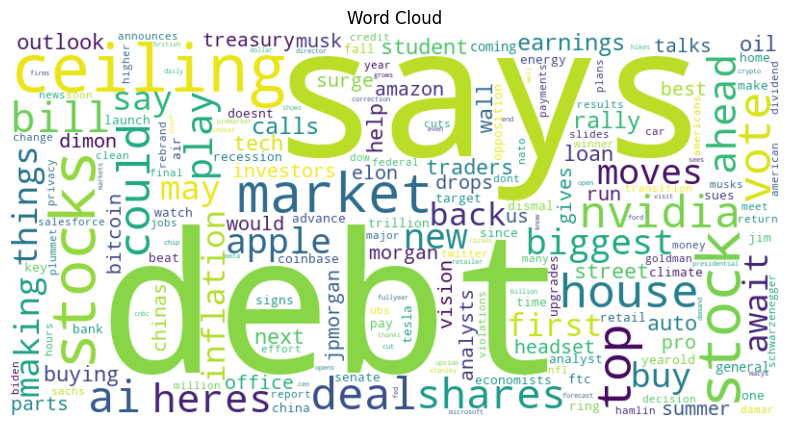

In [226]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(test_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

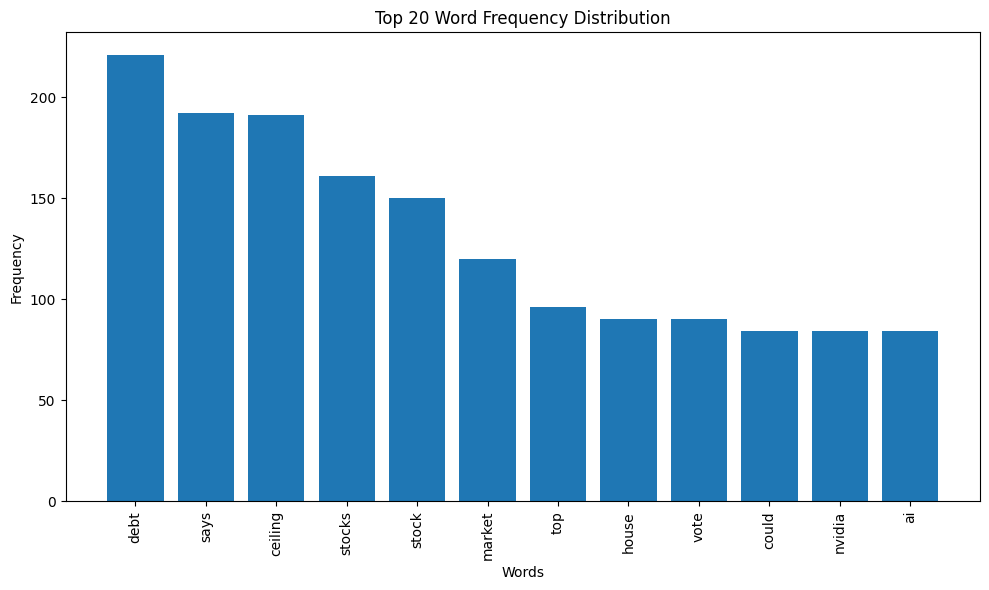

In [194]:
import matplotlib.pyplot as plt


# Extract the words and frequencies into separate lists
words = [word for word, freq in test_top_words]
frequencies = [freq for word, freq in test_top_words]

# Create a bar plot for frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequency Distribution')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 5 - Training the Model <a class="anchor" id="SENT_page_5"></a>

[Back to Top](#SENT_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

#### Ensure you have the most updated version of scikit-learn

In [140]:
# !pip install --upgrade scikit-learn

## Establish dataframes for traing the model

#### Labeled training data for training the model

In [202]:
train_df2 = balanced_data
train_df2.head(2)

,sentiment,filtered_tokens,tokens_string
4662,0,"[cocacola, market, leader, manufacturers, mark...",cocacola market leader manufacturers market sh...
4745,0,"[nokia, shares, hit, euros, friday, percent, s...",nokia shares hit euros friday percent start ye...


#### Test data to apply the model for Sentiment Analysis

In [227]:
test_vizR.head(2)

,text,processed_text,tokens,test_filtered_tokens
0,treasury says it could run out of money june 5...,treasury says it could run out of money june ...,"[treasury, says, it, could, run, out, of, mone...","[treasury, says, could, run, money, june, buyi..."
1,top 10 cheapest places in the u.s. to buy a be...,top cheapest places in the us to buy a beach ...,"[top, cheapest, places, in, the, us, to, buy, ...","[top, cheapest, places, us, buy, beach, house]"


#### I was haiving some issue with the simple methods of creating a df with only selected columns, here I had to drop each column individually 

In [228]:
testdf1 = test_vizR

In [229]:
testdf1.drop('text', axis=1, inplace=True)
testdf1.head()

,processed_text,tokens,test_filtered_tokens
0,treasury says it could run out of money june ...,"[treasury, says, it, could, run, out, of, mone...","[treasury, says, could, run, money, june, buyi..."
1,top cheapest places in the us to buy a beach ...,"[top, cheapest, places, in, the, us, to, buy, ...","[top, cheapest, places, us, buy, beach, house]"
2,with emergency savings down and credit card ba...,"[with, emergency, savings, down, and, credit, ...","[emergency, savings, credit, card, balances, s..."
3,bernstein gives an undertheradar way to play t...,"[bernstein, gives, an, undertheradar, way, to,...","[bernstein, gives, undertheradar, way, play, t..."
4,schwarzenegger no one gives a s about climate ...,"[schwarzenegger, no, one, gives, a, s, about, ...","[schwarzenegger, one, gives, climate, change, ..."


In [230]:
testdf1.drop('processed_text', axis=1, inplace=True)
testdf1.head()

,tokens,test_filtered_tokens
0,"[treasury, says, it, could, run, out, of, mone...","[treasury, says, could, run, money, june, buyi..."
1,"[top, cheapest, places, in, the, us, to, buy, ...","[top, cheapest, places, us, buy, beach, house]"
2,"[with, emergency, savings, down, and, credit, ...","[emergency, savings, credit, card, balances, s..."
3,"[bernstein, gives, an, undertheradar, way, to,...","[bernstein, gives, undertheradar, way, play, t..."
4,"[schwarzenegger, no, one, gives, a, s, about, ...","[schwarzenegger, one, gives, climate, change, ..."


In [231]:
testdf1.drop('tokens', axis=1, inplace=True)
testdf1.head()

KeyError: "['tokens'] not found in axis"

## This data will be applied to the model

In [246]:
testdf1.head()

,test_filtered_tokens
0,"[treasury, says, could, run, money, june, buyi..."
1,"[top, cheapest, places, us, buy, beach, house]"
2,"[emergency, savings, credit, card, balances, s..."
3,"[bernstein, gives, undertheradar, way, play, t..."
4,"[schwarzenegger, one, gives, climate, change, ..."


# Train Test Split

##  At this point pre processing is complete except balancing the data

In [247]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


In [248]:
# https://365datascience.com/tutorials/python-tutorials/sentiment-analysis-with-python/#5
#Step 4: TF-IDF Transformation

In [249]:
# from sklearn.feature_extraction.text import TfidfVectorizer


In [250]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

In [251]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8634 entries, 4662 to 204
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        8634 non-null   int64 
 1   filtered_tokens  8634 non-null   object
 2   tokens_string    8634 non-null   object
dtypes: int64(1), object(2)
memory usage: 269.8+ KB


In [252]:
# The 'filtered_tokens' was 
train_df2['tokens_string'] = train_df2['filtered_tokens'].apply(' '.join)

In [253]:
X = tfidf.fit_transform(train_df2['tokens_string'])

In [254]:
y = train_df2['sentiment']

In [255]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
# from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [257]:
# from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test) # 

0.8697162709901564

## Testing test_df1

In [258]:
# # Assuming you have an unlabeled test dataset stored in a DataFrame called test_df

# # Preprocess the test dataset
# test_df1['tokens_string'] = test_df['test_filtered_tokens'].apply(' '.join)

# # Transform the test dataset using the same TF-IDF vectorizer
# X_test_transformed1 = tfidf.transform(test_df['tokens_string'])

# # Make predictions on the test dataset
# test_preds1 = lr.predict(X_test_transformed)

# # You can now use the 'test_preds' array to get the predicted sentiment labels for your test dataset


TypeError: sequence item 0: expected str instance, list found

In [259]:

# Preprocess the test dataset
# The individual strings were a list which was not tolerated by tfidf, the below line joins them back into a string for analysis
test_df['tokens_string'] = test_df['filtered_tokens'].apply(' '.join)

# Transform the test dataset using the same TF-IDF vectorizer
X_test_transformed = tfidf.transform(test_df['tokens_string'])

# Make predictions on the test dataset
test_preds = lr.predict(X_test_transformed)

# You can now use the 'test_preds' array to get the predicted sentiment labels for your test dataset


#### Here is an array of the sentiment prediction for the text fed to the model
* 0 = Negative
* 1 = Neutral
* 2 = Positive

In [264]:
test_preds

# If the array is not displayed try running:
# np.set_printoptions(threshold=np.inf)
# print(test_preds)

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,

In [266]:
testdf1.head(2)

,test_filtered_tokens
0,"[treasury, says, could, run, money, june, buyi..."
1,"[top, cheapest, places, us, buy, beach, house]"


In [267]:
testdf1['sentiment'] = test_preds

In [273]:


# Define the mapping dictionary
sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Create the new 'sentimentR' column by mapping the values from 'sentiment'
testdf1['sentimentR'] = testdf1['sentiment'].map(sentiment_mapping)

# Print or view the modified DataFrame
testdf1.head()


,test_filtered_tokens,sentiment,sentimentR
0,"[treasury, says, could, run, money, june, buyi...",1,neutral
1,"[top, cheapest, places, us, buy, beach, house]",1,neutral
2,"[emergency, savings, credit, card, balances, s...",1,neutral
3,"[bernstein, gives, undertheradar, way, play, t...",2,positive
4,"[schwarzenegger, one, gives, climate, change, ...",1,neutral


In [274]:
testdf1.sentimentR.value_counts()

sentimentR
neutral     1574
positive     175
negative      63
Name: count, dtype: int64

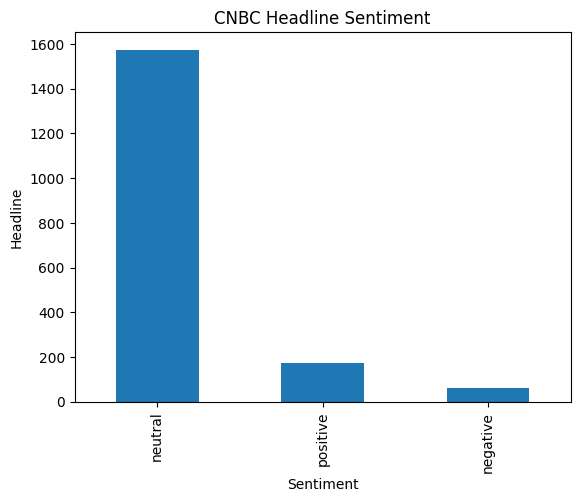

In [275]:
testdf1[['sentimentR', 'test_filtered_tokens']].value_counts('sentimentR').plot(kind='bar', title='CNBC Headline Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Headline')
plt.show()